In [2]:
import numpy as np
import matplotlib.pyplot as plt

Here we are investigating IVT threshhold sensitivities to both size of the AR, and resolution of datasets we want to identify them in. 

Consider a cross section through an $\text{IVT}(\text{lon},\text{lat})$ surface. For conceptual clarity, imagine the cross section taken along the "length", $y$, or "width", $x$, of the AR (i.e. along the semi-major or semi-minor axes). Idealise the values of $\text{IVT}$ along this cross section using the Gaussian function $\text{IVT}(y,w)=\text{IVT}_0\exp(-y^2/w^2)$. Note the cross section could be in any direction: the "bellshaped curve" the reviewer is talking about is not related to the elliptical shape of the ARs, but rather the shape of the $\text{IVT}$ function.

We want to understand to what extent "gridding" this idealised $\text{IVT}$ function introduces errors, which may effect sensitivity to identification thresholds etc. Consider a grid size of $s$ km. Then the "gridded", or average $\text{IVT}$, for a grid cell centred at the point $y$ is $\overline{IVT}(y,s,w)=\frac{1}{s}\int_{y-s/2}^{y+s/2}\text{IVT}_0\exp(-y'^2/w^2)\, dy'$. Note we are integrating over the domain $y'\in[y-s/2, y+s/2]$. The reviewer has used the dummy variable $y'$, to distinguish it from $y$, which can now be thought of as the center of a grid cell.

We can then compare $\overline{IVT}(y,s,w)$ with the value of $\text{IVT}(y,w)$ or more appropriately with $\text{IVT}(y\pm s/2)$ as for an increasing or decreasing function, errors between function and average largest at endpoints. 

By performing this comparison at multiple points $y$, and for multiple choices of $s$ and $w$, we can assess sensitivity of thresholds to AR size, and gridsize etc. Note we expect error to go to zero as $s\to 0$ and $w \to \infty$.  

In [8]:
# Define range of "width" parameter w we want to consider. 
# We want to consider "rivers" between 2000 and 6000 km long. 
w=np.linspace(500, 2500, 50)
# Define the gridsizes we want to consider. 
s=np.linspace(1, 200, 100)

In [9]:
# Note IVT0 is the maximum value of IVT - call this A for simplicity.
# Choose a plausible value for A.
A = 800

# We want to calculate the mean IVT quantity defined above at various points.
# Here we consider four points, y=0, y=w/(2*sqrt(2)), y=w/sqrt(2), and y=3*w/(2*sqrt(2)).
# These choices motivated by observation that Gaussian rate of change a maximum at w/(2*sqrt(2)),
# so might expect errors to be largest here.

# Define arrays to store results at each of the four points defined above.
M0 = np.zeros((w.size,s.size))
M1 = np.zeros((w.size,s.size))
M2 = np.zeros((w.size,s.size))
M3 = np.zeros((w.size,s.size))

# Calculate "gridcell" averages
for i in np.arange(s.size):
    for j in np.arange(w.size):
        y0 = np.linspace(-s[i]/2,s[i]/2,1000)
        y1 = w[j]/(2*np.sqrt(2)) + np.linspace(-s[i]/2,s[i]/2,1000)
        y2 = w[j]/np.sqrt(2) + np.linspace(-s[i]/2,s[i]/2,1000)
        y3 = 3*w[j]/(2*np.sqrt(2)) + np.linspace(-s[i]/2,s[i]/2,1000)
        
        M0[j,i] = (1/s[i])*np.trapz(A*np.exp(-y0**2/w[j]**2),y0)
        M1[j,i] = (1/s[i])*np.trapz(A*np.exp(-y1**2/w[j]**2),y1)
        M2[j,i] = (1/s[i])*np.trapz(A*np.exp(-y2**2/w[j]**2),y2)
        M3[j,i] = (1/s[i])*np.trapz(A*np.exp(-y3**2/w[j]**2),y3)

In [10]:
# Here we calculate the values of IVT on edges of grid cells to compare with arrays above.

# Initialise arrays
v0 = np.zeros((w.size,s.size))
v1 = np.zeros((w.size,s.size))
v2 = np.zeros((w.size,s.size))
v3 = np.zeros((w.size,s.size))

for i in np.arange(w.size):
    
    # For simplicity, define the points at which to calculate IVT values
    p0=0
    p1=w[i]/(2*np.sqrt(2))
    p2=w[i]/(np.sqrt(2))
    p3=3*w[i]/(2*np.sqrt(2))

    # Consider values at righthand edge, lefthand edge, or center of gridcells centred at point p.
    # As noted above however, errors between average over gridcell and values
    # within that cell will usually be largest at gridcell edges.
    # Because we want to understand/constrain errors, makes sense to consider largest values.
    # Note errors are much smaller when using the center points, unsurprising
    # given above discussion.  
    
    # Comment/uncomment other choices to compare results
    
    t0=p0+s/2
    t1=p1+s/2
    t2=p2+s/2
    t3=p3+s/2
    
#     t0=p0-s/2
#     t1=p1-s/2
#     t2=p2-s/2
#     t3=p3-s/2
    
#     t0=p0
#     t1=p1
#     t2=p2
#     t3=p3
    
    # Calculate results
    v0[i,:] = A*np.exp(-t0**2/w[i]**2)
    v1[i,:] = A*np.exp(-t1**2/w[i]**2)
    v2[i,:] = A*np.exp(-t2**2/w[i]**2)
    v3[i,:] = A*np.exp(-t3**2/w[i]**2)

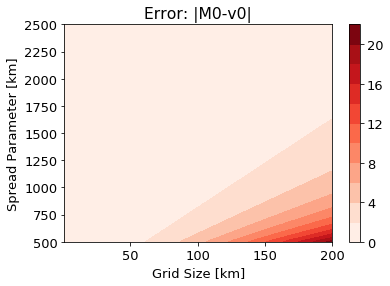

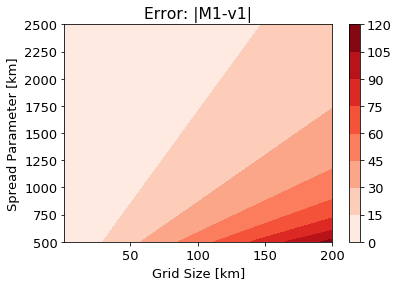

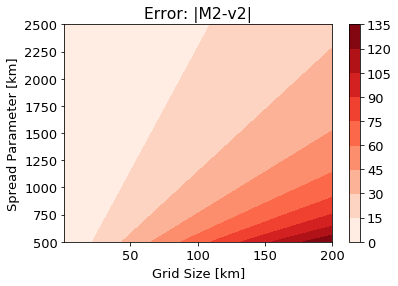

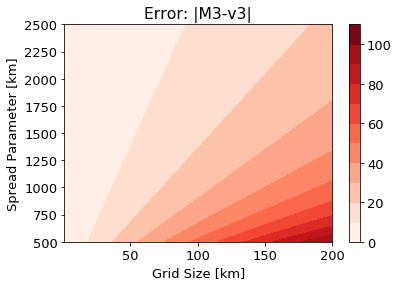

In [19]:
plt.rcParams.update({'font.size': 13})

# Plot Absolute Errors
plt.figure()
plt.title('Error: |M0-v0|')
plt.contourf(s,w,np.abs(M0-v0),levels=10, cmap='Reds')
plt.xlabel('Grid Size [km]')
plt.ylabel('Spread Parameter [km]')
plt.colorbar()
plt.savefig('0.svg', format='svg')

plt.figure()
plt.title('Error: |M1-v1|')
plt.contourf(s,w,np.abs(M1-v1),levels=10, cmap='Reds')
plt.xlabel('Grid Size [km]')
plt.ylabel('Spread Parameter [km]')
plt.colorbar()
plt.savefig('1.svg', format='svg')

plt.figure()
plt.title('Error: |M2-v2|')
plt.contourf(s,w,np.abs(M2-v2),levels=10, cmap='Reds')
plt.xlabel('Grid Size [km]')
plt.ylabel('Spread Parameter [km]')
plt.colorbar()
plt.savefig('2.svg', format='svg')

plt.figure()
plt.title('Error: |M3-v3|')
plt.contourf(s,w,np.abs(M3-v3),levels=10, cmap='Reds')
plt.xlabel('Grid Size [km]')
plt.ylabel('Spread Parameter [km]')
plt.colorbar()
plt.savefig('3.svg', format='svg')

Thus errors can be substantial - could plot as relative error to get better idea. Note that the much smaller errors at $y=0$ due to the fact the Gaussian has a turning point here. Errors higher at $w/\sqrt{2}$ as Gaussian has max rate of change here. Note errors much, much smaller when average compared to value at center of gridpoint, 

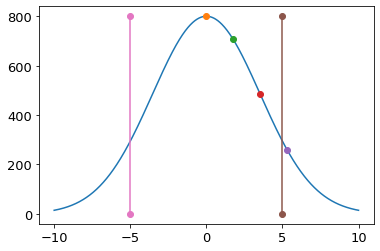

In [43]:
# Create plot to check layout of schematic
y = np.linspace(-10,10,1000)
w = 5

def v(A,y,w):
    return A*np.exp(-y**2/w**2)

v_vec = v(A,y,w)
plt.plot(y,v_vec)

y0=0
y1=w/(2*np.sqrt(2))
y2=w/np.sqrt(2)
y3=3*w/(2*np.sqrt(2))

plt.plot(y0,v(A,y0,w),'-o')
plt.plot(y1,v(A,y1,w),'-o')
plt.plot(y2,v(A,y2,w),'-o')
plt.plot(y3,v(A,y3,w),'-o')
plt.plot([w,w],[0,800],'-o')
plt.plot([-w,-w],[0,800],'-o')

plt.savefig('schematic.svg', format='svg')

In [44]:
w/2

2.5

In [46]:
w/np.sqrt(2)

3.5355339059327373